In [93]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
import numpy as np
from amftrack.pipeline.launching.run_super import (
    run_launcher,
    directory_scratch,
    directory_project,
    directory_project,
    run_parallel_stitch,
)
import os
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    get_current_folders,
    get_folders_by_plate_id,
)
import sys

import os
from amftrack.pipeline.functions.image_processing.hyphae_id_surf import (
    resolve_anastomosis_crossing_by_root,
)
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
    save_graphs,
    Node,
    Edge,
)

import pandas as pd
import json
from time import time_ns
from amftrack.util.sys import temp_path
from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_random_edge,
    distance_point_edge,
    plot_edge,
    plot_edge_cropped,
    find_nearest_edge,
    get_edge_from_node_labels,
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    find_neighboring_edges,
    reconstruct_image,
    reconstruct_skeletton_from_edges,
    reconstruct_skeletton_unicolor,
    plot_edge_width,
    reconstruct_image_from_general,
    plot_full,
)
from amftrack.pipeline.launching.run_super import (
    run_launcher,
    directory_scratch,
    directory_project,
    directory_project,
    run_parallel_stitch,
)
import os
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    get_current_folders,
    get_folders_by_plate_id,
)
from time import time_ns
from amftrack.util.dbx import upload_folders, load_dbx, download, get_dropbox_folders
from datetime import datetime
import matplotlib.pyplot as plt
from amftrack.pipeline.functions.image_processing.hyphae_id_surf import (
    resolve_anastomosis_crossing_by_root,
)
from datetime import timedelta
import networkx as nx

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
plates = ["1048_20220506", "1045_20220504"]

In [3]:
update_plate_info(directory_project, local=True)
all_folders = get_current_folders(directory_project, local=True)

analysed:   0%|          | 0/3014 [00:00<?, ?it/s]

In [4]:
folders = all_folders.loc[all_folders["unique_id"].isin(plates)]
folders = folders.loc[folders["/Analysis/nx_graph_pruned_labeled.p"] == True]

In [5]:
exp = Experiment(directory_project)
select_folders = folders.loc[(folders["unique_id"] == "1048_20220506")]
select_folders = select_folders.sort_values(by="folder").iloc[:60]
exp.load(select_folders)

2022-05-06 23:50:00
2022-05-07 01:50:00
2022-05-07 03:50:00
2022-05-07 05:50:00
2022-05-07 07:50:00
2022-05-07 09:50:00
2022-05-07 11:50:00
2022-05-07 13:50:00
2022-05-07 15:50:00
2022-05-07 17:50:00
2022-05-07 19:50:00
2022-05-07 21:50:00
2022-05-07 23:50:00
2022-05-08 01:50:00
2022-05-08 03:50:00
2022-05-08 05:50:00
2022-05-08 07:50:00
2022-05-08 09:50:00
2022-05-08 11:50:00
2022-05-08 13:50:00
2022-05-08 15:50:00
2022-05-08 18:02:00
2022-05-08 20:02:00
2022-05-08 22:02:00
2022-05-09 00:02:00
2022-05-09 02:02:00
2022-05-09 04:02:00
2022-05-09 09:39:00
2022-05-09 11:39:00
2022-05-09 13:39:00
2022-05-09 15:39:00
2022-05-09 17:39:00
2022-05-09 19:39:00
2022-05-09 21:39:00
2022-05-09 23:39:00
2022-05-10 01:39:00
2022-05-10 03:39:00
2022-05-10 05:39:00
2022-05-10 07:39:00
2022-05-10 09:50:00
2022-05-10 11:53:00
2022-05-10 14:12:00
2022-05-10 16:12:00
2022-05-10 18:10:00
2022-05-10 20:10:00
2022-05-10 22:11:00
2022-05-11 00:11:00
2022-05-11 02:10:00
2022-05-11 04:11:00
2022-05-11 06:10:00


In [6]:
edges = {edge for g in exp.nx_graph for edge in g.edges}
exp.edges = []
for edge in edges:
    node1 = Node(edge[0], exp)
    node2 = Node(edge[1], exp)
    exp.edges.append(Edge(node1, node2, exp))

In [7]:
select_edges = [edge for edge in exp.edges if len(edge.ts()) > 50]

***An edge that has 0 width***

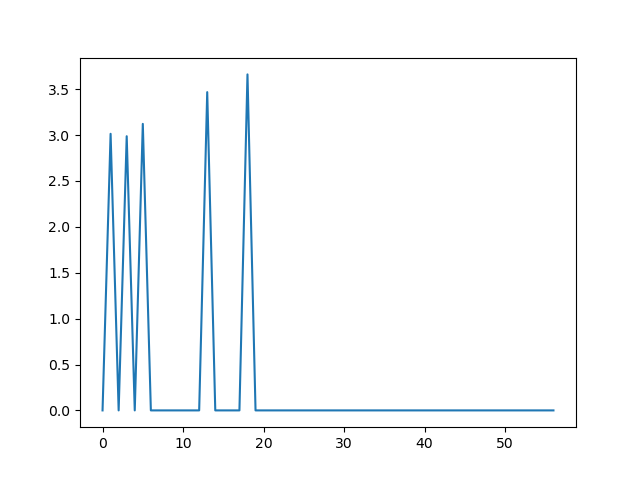

In [10]:
edge = select_edges[2]
fig, ax = plt.subplots()

ax.plot([edge.width(t) for t in edge.ts()], label=edge)

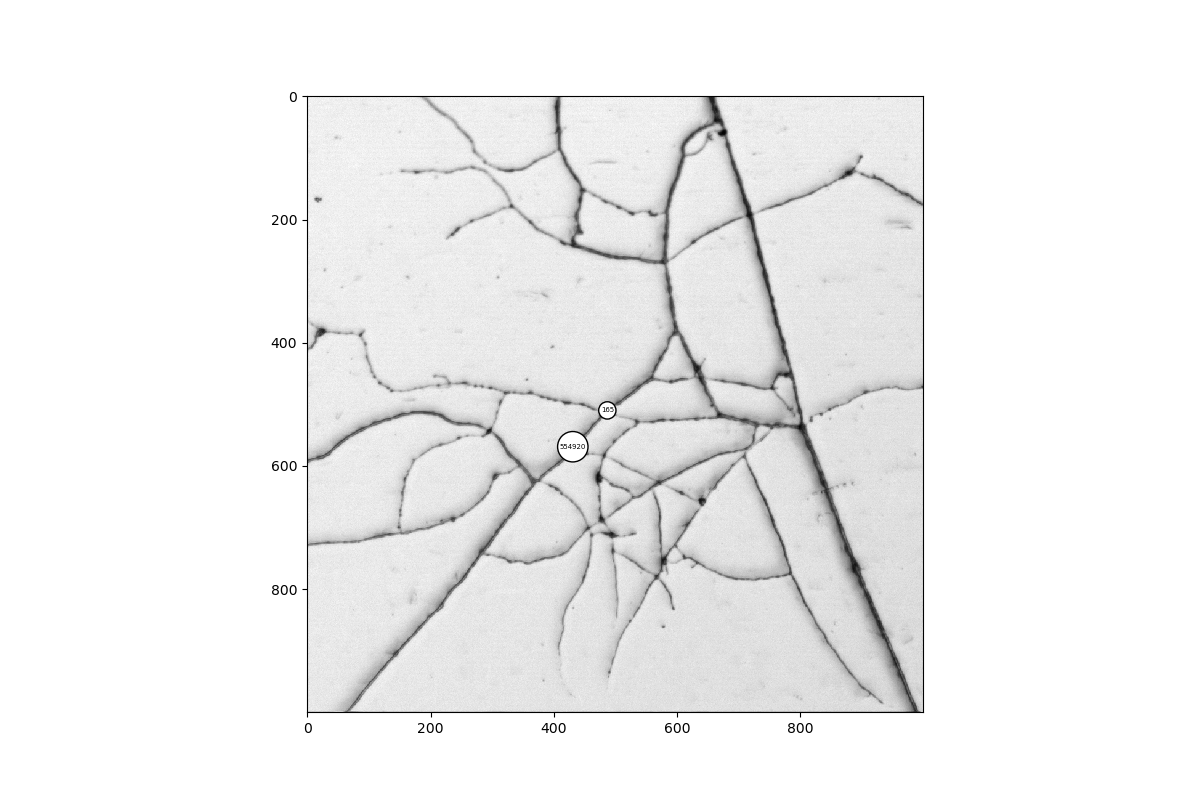

In [11]:
t0 = 50
# node_interest = [node for node in nodes_init if t in node.ts()]
node_interest = [edge.end, edge.begin]
downsizing = 1
pos = edge.end.pos(t0)
window = 500
exp.load_tile_information(t0)
plot_full_image_with_features(
    exp,
    t0,
    downsizing=downsizing,
    region=[[pos[0] - window, pos[1] - window], [pos[0] + window, pos[1] + window]],
    nodes=node_interest,
    edges=[],
    dilation=1,
    prettify=False,
    # save_path = os.path.join(temp_path,f'{node_interest[0].label}_{t}_myr.png')
)

***A nice hypha***

In [15]:
resolve_anastomosis_crossing_by_root(exp, lim_considered=30)

0.0
0.40816326530612246
0.8163265306122449
Detected problems during hyphae detection, 18 hyphaes have inconsistent root over time
getting anastomosing 472
relabeling
240
14
1
10
1
22
49
9
0
4
26
22
27
26
27
30
29
26
26
28
25
26
25
25
45
10
10
11
13
21
20
15
20
17
16
15
15
15
18
19
45
15
29
31
28
32
27
28
39
32
29
28
44
19
40
28
48
29
29
32
29
27
34
33
31
28
28
28
58
28
29
29
33
31
31
28
28
34
33
31
30
33
40
31
33
32
58
29
29
29
29
30
29
32
34
29
36
29
23
8
3
30
33
31
50
32
30
33
35
30
41
31
31
30
46
35
31
27
31
3
23
23
23
42
27
23
24
24
26
30
25
11
23
30
19
20
25
6
5
32
43
56
6
9
8
8
7
20
8
8
7
16
8
8
29
9
20
26
46
17
22
17
23
26
20
23
20
28
51
22
27
17
18
18
6
10
21
10
6
16
8
9
6
24
27
36
24
34
24
28
24
24
25
8
7
7
11
20
45
19
14
18
15
24
19
13
20
18
51
18
29
17
22
11
11
8
26
16
26
26
26
28
27
24
22
33
25
12
10
57
11
9
11
12
41
46
23
18
20
19
7
getting hyphae again
0.0
0.029704440813901677
0.059408881627803355
0.08911332244170503
0.11881776325560671
0.1485222040695084
0.17822664488341

In [31]:
hypha = [hyph for hyph in exp.hyphaes if hyph.end.label == 549566][0]

***selecting the pseudo edge that exist at all time***

In [102]:
t0 = hypha.ts[-1]
node_interest = hypha.get_edges(t0)[2][1:]
node_first = []
for node in node_interest:
    t = node.ts()[0]
    if t <= t0:
        print(t)
        node_first.append(node)
        t0 = t

59
59
57
57
56
54
54
53
52
51
51
50
48
45
44
43
43
41
39
39
37
34
33
32
30
29
27
27
25
24
21
18
16
13
11
10
8
4


In [80]:
node_first

[Node(574418),
 Node(574405),
 Node(572079),
 Node(572085),
 Node(570778),
 Node(568440),
 Node(568443),
 Node(567314),
 Node(566204),
 Node(564982),
 Node(565002),
 Node(564021),
 Node(561735),
 Node(559173),
 Node(558407),
 Node(557413),
 Node(557431),
 Node(555884),
 Node(554329),
 Node(554333),
 Node(553088),
 Node(551564),
 Node(551079),
 Node(550551),
 Node(549732),
 Node(549076),
 Node(548343),
 Node(548345),
 Node(497643),
 Node(459955),
 Node(366947),
 Node(253645),
 Node(185567),
 Node(84827),
 Node(37385),
 Node(17784),
 Node(617203),
 Node(563582)]

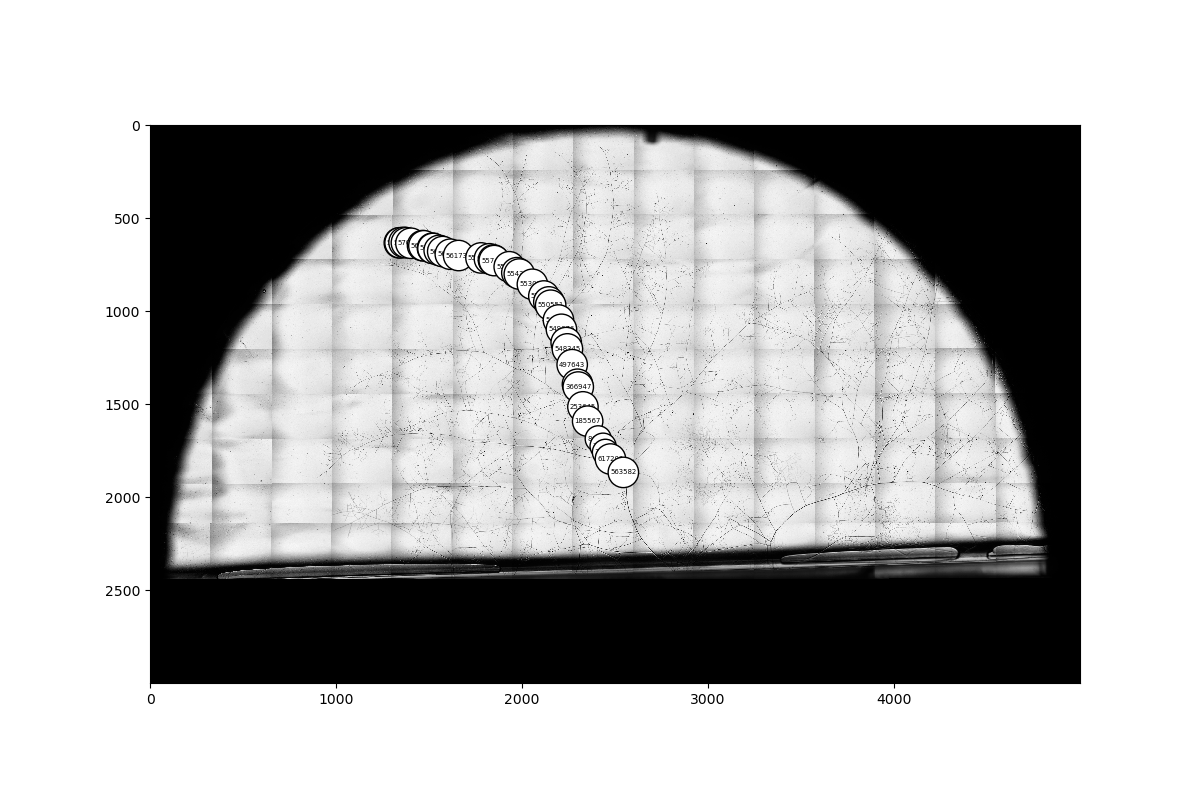

In [82]:
t = 59
node_interest = [hyph.end for hyph in exp.hyphaes if t in hyph.ts]
# node_interest = [hypha.end]
# node_interest = hypha.get_edges(t)[2]
node_interest = node_first
exp.load_tile_information(t)
plt.close("all")
plot_full_image_with_features(
    exp,
    t,
    downsizing=10,
    region=[[0, 0], [30000, 50000]],
    nodes=node_interest,
    edges=[],
    dilation=1,
    prettify=False,
    save_path=os.path.join(
        temp_path, f"{edge.begin.label}_{edge.end.label}_{t}_width.png"
    ),
)

In [103]:
pseudo_edges = [(node_first[i], node_first[i + 1]) for i in range(len(node_first) - 1)]

In [104]:
def get_edges_between(node1, node2, t):
    nodes = nx.shortest_path(
        node1.experiment.nx_graph[t],
        source=node1.label,
        target=node2.label,
        weight="weight",
    )
    edges = [
        Edge(
            node1.experiment.get_node(nodes[i]),
            node1.experiment.get_node(nodes[i + 1]),
            node1.experiment,
        )
        for i in range(len(nodes) - 1)
    ]
    return edges

In [105]:
def get_width_pseudo(pseudo_edge, t):
    edges = get_edges_between(pseudo_edge[0], pseudo_edge[1], t)
    widths = [edge.width(t) for edge in edges]
    return np.mean(widths)

In [95]:
get_width(pseudo_edges[0], pseudo_edges[0][0].ts()[-1])

0.0

(5.0, 18.0)

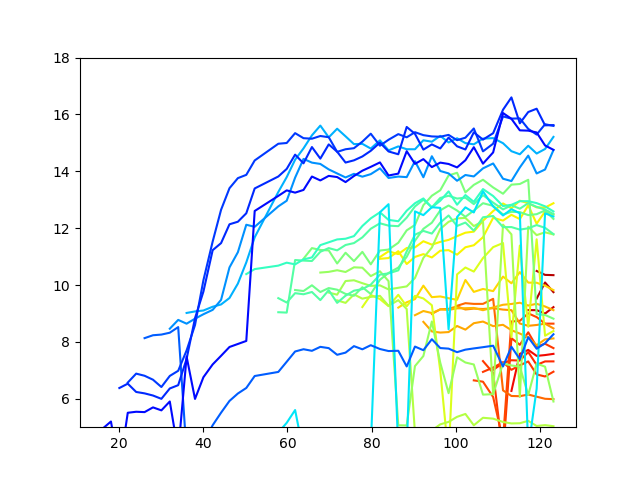

In [101]:
from matplotlib import cm

fig, ax = plt.subplots()
for edge in pseudo_edges:
    times = [
        (select_folders["datetime"].iloc[t] - select_folders["datetime"].iloc[0])
        / timedelta(hours=1)
        for t in edge[0].ts()
    ]
    # print(times)
    widths = [get_width_pseudo(edge, t) for t in edge[0].ts()]
    if not 0 in widths:
        ax.plot(times, widths, color=cm.jet(edge[0].ts()[0] / 60))
ax.set_ylim(5, 18)
# plt.legend()

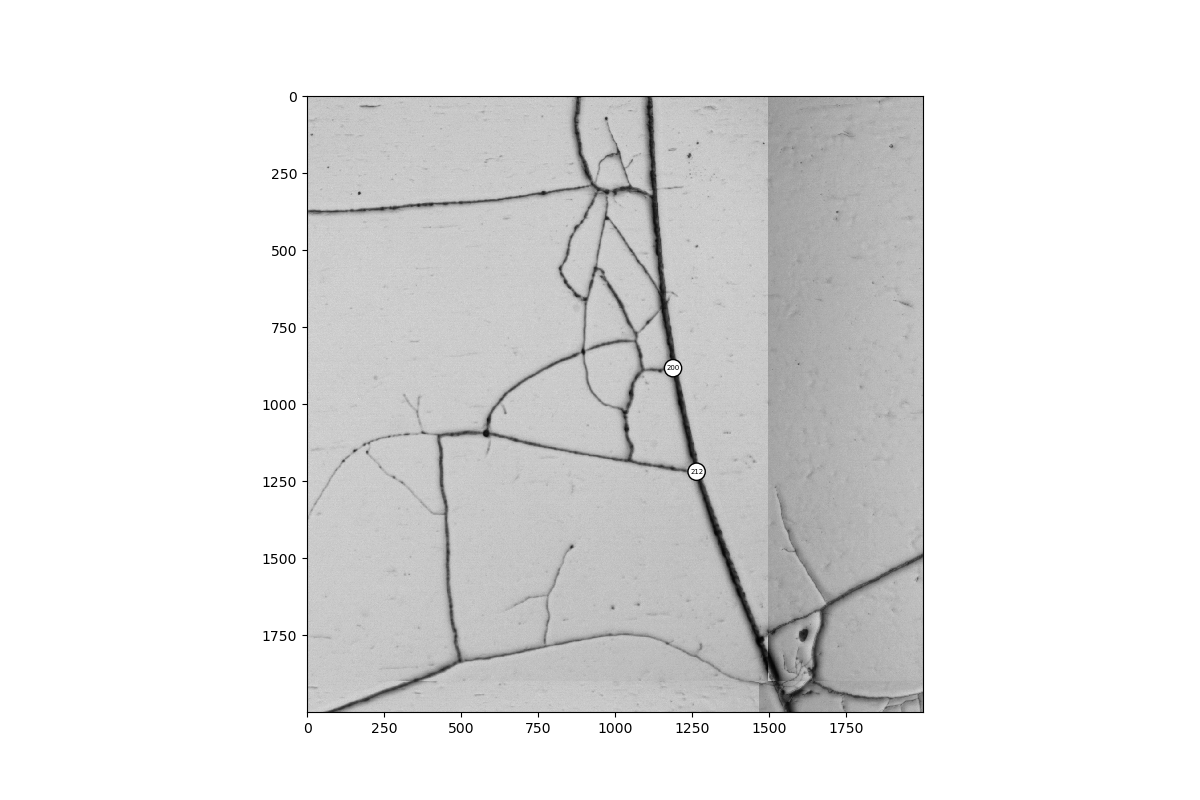

In [23]:
for t in edge.ts():
    exp.load_tile_information(t)
    plt.close("all")
    plot_full_image_with_features(
        exp,
        t,
        downsizing=1,
        region=[[1950 * 10, 2450 * 10], [2150 * 10, 2650 * 10]],
        nodes=node_interest,
        edges=[],
        dilation=1,
        prettify=False,
        save_path=os.path.join(
            temp_path, f"{edge.begin.label}_{edge.end.label}_{t}_width.png"
        ),
    )

In [8]:
times = [
    (select_folders["datetime"].iloc[t] - select_folders["datetime"].iloc[0])
    / timedelta(hours=1)
    for t in edge.ts()
]

AttributeError: 'tuple' object has no attribute 'ts'

In [36]:
from amftrack.util.video_util import make_video

paths = [
    os.path.join(temp_path, f"{edge.begin.label}_{edge.end.label}_{t}_width.png")
    for t in edge.ts()
]
texts = [f"{int(time)}h" for time in times]
make_video(
    paths, texts, None, save_path=f"video{edge.begin.label}_{edge.end.label}.mp4"
)

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [31]:
select_folders["datetime"]

698    2022-05-06 23:50:00
498    2022-05-07 01:50:00
2667   2022-05-07 03:50:00
2763   2022-05-07 05:50:00
1881   2022-05-07 07:50:00
2133   2022-05-07 09:50:00
19     2022-05-07 11:50:00
1133   2022-05-07 13:50:00
1856   2022-05-07 15:50:00
1657   2022-05-07 17:50:00
558    2022-05-07 19:50:00
1655   2022-05-07 21:50:00
520    2022-05-07 23:50:00
2393   2022-05-08 01:50:00
1871   2022-05-08 03:50:00
469    2022-05-08 05:50:00
153    2022-05-08 07:50:00
1143   2022-05-08 09:50:00
1801   2022-05-08 11:50:00
2658   2022-05-08 13:50:00
772    2022-05-08 15:50:00
281    2022-05-08 18:02:00
1812   2022-05-08 20:02:00
2062   2022-05-08 22:02:00
2692   2022-05-09 00:02:00
310    2022-05-09 02:02:00
1504   2022-05-09 04:02:00
2531   2022-05-09 09:39:00
117    2022-05-09 11:39:00
331    2022-05-09 13:39:00
2188   2022-05-09 15:39:00
2222   2022-05-09 17:39:00
202    2022-05-09 19:39:00
1999   2022-05-09 21:39:00
786    2022-05-09 23:39:00
1105   2022-05-10 01:39:00
2471   2022-05-10 03:39:00
6

In [40]:
select_edges

[Edge(548146,548757),
 Edge(460150,460151),
 Edge(151685,151692),
 Edge(320605,366852),
 Edge(634094,59193),
 Edge(285967,574577),
 Edge(37433,563585),
 Edge(532405,532410),
 Edge(366947,548889),
 Edge(549574,574555),
 Edge(588353,185539),
 Edge(84920,59246),
 Edge(151742,151737),
 Edge(617248,617247),
 Edge(151691,162),
 Edge(574562,574561),
 Edge(554920,165),
 Edge(532192,548683),
 Edge(574563,634097),
 Edge(548122,548127),
 Edge(602395,549583),
 Edge(460066,460081),
 Edge(563638,563623),
 Edge(549023,549020),
 Edge(84831,151685),
 Edge(430412,430402),
 Edge(548541,548532),
 Edge(37495,275),
 Edge(548016,548004),
 Edge(549098,460151),
 Edge(548889,549227),
 Edge(547972,547985),
 Edge(366844,430476),
 Edge(548364,549157),
 Edge(460186,366856),
 Edge(59209,84881),
 Edge(398512,532230),
 Edge(221,222),
 Edge(151692,253586),
 Edge(547988,497891),
 Edge(263,268),
 Edge(253,273),
 Edge(602363,320612),
 Edge(574587,574589),
 Edge(320641,549094),
 Edge(430400,532389),
 Edge(212,617232),
 Edg